# Data Cleaning

In [3]:
from nltk.corpus import stopwords
import string

# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

# turn a doc into clean tokens
def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    # remove punctuation from each token
    table = str.maketrans('', '', string.punctuation)
    tokens = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return tokens

# load the document
filename = 'txt_sentoken/pos/cv000_29590.txt'
text = load_doc(filename)
tokens = clean_doc(text)
print(tokens)

44276
[('film', 7983), ('one', 4946), ('movie', 4826), ('like', 3201), ('even', 2262), ('good', 2080), ('time', 2041), ('story', 1907), ('films', 1873), ('would', 1844), ('much', 1824), ('also', 1757), ('characters', 1735), ('get', 1724), ('character', 1703), ('two', 1643), ('first', 1588), ('see', 1557), ('way', 1515), ('well', 1511), ('make', 1418), ('really', 1407), ('little', 1351), ('life', 1334), ('plot', 1288), ('people', 1269), ('could', 1248), ('bad', 1248), ('scene', 1241), ('movies', 1238), ('never', 1201), ('best', 1179), ('new', 1140), ('scenes', 1135), ('man', 1131), ('many', 1130), ('doesnt', 1118), ('know', 1092), ('dont', 1086), ('hes', 1024), ('great', 1014), ('another', 992), ('action', 985), ('love', 977), ('us', 967), ('go', 952), ('director', 948), ('end', 946), ('something', 945), ('still', 936)]


# Define vocabulary

In [5]:
from string import punctuation
from os import listdir
from collections import Counter
from nltk.corpus import stopwords

# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

# turn a doc into clean tokens
def clean_doc(doc):
    
    # split into tokens by white space
    tokens = doc.split()
    
    # remove punctuation from each token
    table = str.maketrans('', '', punctuation)
    tokens = [w.translate(table) for w in tokens]
    
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return tokens

# load doc and add to vocab
def add_doc_to_vocab(filename, vocab):
    # load doc
    doc = load_doc(filename)
    # clean doc
    tokens = clean_doc(doc)
    # update counts
    vocab.update(tokens)

# load all docs in a directory
def process_docs(directory, vocab):
    # walk through all files in the folder
    
    for filename in listdir(directory):
        
        # skip files that do not have the right extension
        if not filename.endswith(".txt"):
            continue
        # create the full path of the file to open
        path = directory + '/' + filename
        # add doc to vocab
        add_doc_to_vocab(path, vocab)

# save list to file
def save_list(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w')
    file.write(data)
    file.close()

# define vocab
vocab = Counter()

# add all docs to vocab
process_docs('txt_sentoken/neg', vocab)
process_docs('txt_sentoken/pos', vocab)

# print the size of the vocab
print(len(vocab))

# print the top words in the vocab
print(vocab.most_common(50))

# keep tokens with > 5 occurrence
min_occurane = 5
tokens = [k for k,c in vocab.items() if c >= min_occurane]
print("Post min occurence cleaning: ",len(tokens))

# save tokens to a vocabulary file
save_list(tokens, 'vocab.txt')

46557
[('film', 8860), ('one', 5521), ('movie', 5440), ('like', 3553), ('even', 2555), ('good', 2320), ('time', 2283), ('story', 2118), ('films', 2102), ('would', 2042), ('much', 2024), ('also', 1965), ('characters', 1947), ('get', 1921), ('character', 1906), ('two', 1825), ('first', 1768), ('see', 1730), ('well', 1694), ('way', 1668), ('make', 1590), ('really', 1563), ('little', 1491), ('life', 1472), ('plot', 1451), ('people', 1420), ('movies', 1416), ('could', 1395), ('bad', 1374), ('scene', 1373), ('never', 1364), ('best', 1301), ('new', 1277), ('many', 1268), ('doesnt', 1267), ('man', 1266), ('scenes', 1265), ('dont', 1210), ('know', 1207), ('hes', 1150), ('great', 1141), ('another', 1111), ('love', 1089), ('action', 1078), ('go', 1075), ('us', 1065), ('director', 1056), ('something', 1048), ('end', 1047), ('still', 1038)]
Post min occurence cleaning:  14803


# Bag-of-Words Representation

In [6]:
from string import punctuation
from os import listdir
from collections import Counter
from nltk.corpus import stopwords

# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

# turn a doc into clean tokens
def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    
    # remove punctuation from each token
    table = str.maketrans('', '', punctuation)
    tokens = [w.translate(table) for w in tokens]
    
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return tokens

# load doc, clean and return line of tokens

def doc_to_line(filename, vocab):
    # load the doc
    doc = load_doc(filename)
    
    # clean doc
    tokens = clean_doc(doc)
    
    # filter by vocab
    tokens = [w for w in tokens if w in vocab]
    return ' '.join(tokens)

# load all docs in a directory
def process_docs(directory, vocab):
    lines = list()
    # walk through all files in the folder
    for filename in listdir(directory):
        
        # skip any reviews in the test set
        if filename.startswith('cv9'):
            continue
            
        # create the full path of the file to open
        path = directory + '/' + filename
        
        # load and clean the doc
        line = doc_to_line(path, vocab)
        
        # add to list
        lines.append(line)
    return lines

# load the vocabulary
vocab_filename = 'vocab.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)
# load all training reviews
positive_lines = process_docs('txt_sentoken/pos', vocab)
negative_lines = process_docs('txt_sentoken/neg', vocab)
# summarize what we have
print(len(positive_lines), len(negative_lines))

900 900


# Movie Reviews to Bag-of-Words Vectors

In [8]:
from string import punctuation
from os import listdir
from collections import Counter
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer

# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

# turn a doc into clean tokens
def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    # remove punctuation from each token
    table = str.maketrans('', '', punctuation)
    tokens = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return tokens

# load doc, clean and return line of tokens
def doc_to_line(filename, vocab):
    # load the doc
    doc = load_doc(filename)
    # clean doc
    tokens = clean_doc(doc)
    # filter by vocab
    tokens = [w for w in tokens if w in vocab]
    return ' '.join(tokens)

# load all docs in a directory
def process_docs(directory, vocab, is_trian):
    lines = list()
    
    # walk through all files in the folder
    
    for filename in listdir(directory):
        # skip any reviews in the test set
        if is_trian and filename.startswith('cv9'):
            continue
        if not is_trian and not filename.startswith('cv9'):
            continue
            
        # create the full path of the file to open
        path = directory + '/' + filename
        
        # load and clean the doc
        line = doc_to_line(path, vocab)
        
        # add to list
        lines.append(line)
    return lines

# load the vocabulary
vocab_filename = 'vocab.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)

# load all training reviews
positive_lines = process_docs('txt_sentoken/pos', vocab, True)
negative_lines = process_docs('txt_sentoken/neg', vocab, True)

# create the tokenizer
tokenizer = Tokenizer()
# fit the tokenizer on the documents
docs = negative_lines + positive_lines
tokenizer.fit_on_texts(docs)

# encode training data set
Xtrain = tokenizer.texts_to_matrix(docs, mode='freq')
print(Xtrain.shape)

# load all test reviews
positive_lines = process_docs('txt_sentoken/pos', vocab, False)
negative_lines = process_docs('txt_sentoken/neg', vocab, False)
docs = negative_lines + positive_lines
# encode training data set
Xtest = tokenizer.texts_to_matrix(docs, mode='freq')
print(Xtest.shape)

(1800, 14781)
(200, 14781)


# Sentiment Analysis Models

## First Sentiment Analysis Model

In [9]:
from numpy import array
from string import punctuation
from os import listdir
from collections import Counter
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

# turn a doc into clean tokens
def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    # remove punctuation from each token
    table = str.maketrans('', '', punctuation)
    tokens = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return tokens

# load doc, clean and return line of tokens
def doc_to_line(filename, vocab):
    # load the doc
    doc = load_doc(filename)
    # clean doc
    tokens = clean_doc(doc)
    # filter by vocab
    tokens = [w for w in tokens if w in vocab]
    return ' '.join(tokens)

# load all docs in a directory
def process_docs(directory, vocab, is_trian):
    lines = list()
    # walk through all files in the folder
    for filename in listdir(directory):
        # skip any reviews in the test set
        if is_trian and filename.startswith('cv9'):
            continue
        if not is_trian and not filename.startswith('cv9'):
            continue
        # create the full path of the file to open
        path = directory + '/' + filename
        # load and clean the doc
        line = doc_to_line(path, vocab)
        # add to list
        lines.append(line)
    return lines

# load the vocabulary
vocab_filename = 'vocab.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)
# load all training reviews
positive_lines = process_docs('txt_sentoken/pos', vocab, True)
negative_lines = process_docs('txt_sentoken/neg', vocab, True)
# create the tokenizer
tokenizer = Tokenizer()
# fit the tokenizer on the documents
docs = negative_lines + positive_lines
tokenizer.fit_on_texts(docs)
# encode training data set
Xtrain = tokenizer.texts_to_matrix(docs, mode='freq')
ytrain = array([0 for _ in range(900)] + [1 for _ in range(900)])

# load all test reviews
positive_lines = process_docs('txt_sentoken/pos', vocab, False)
negative_lines = process_docs('txt_sentoken/neg', vocab, False)
docs = negative_lines + positive_lines
# encode training data set
Xtest = tokenizer.texts_to_matrix(docs, mode='freq')
ytest = array([0 for _ in range(100)] + [1 for _ in range(100)])

n_words = Xtest.shape[1]
# define network
model = Sequential()
model.add(Dense(50, input_shape=(n_words,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile network
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
model.fit(Xtrain, ytrain, epochs=50, verbose=2)
# evaluate
loss, acc = model.evaluate(Xtest, ytest, verbose=0)
print('Test Accuracy: %f' % (acc*100))

Epoch 1/50
57/57 - 1s - loss: 0.6924 - accuracy: 0.5211
Epoch 2/50
57/57 - 0s - loss: 0.6867 - accuracy: 0.7417
Epoch 3/50
57/57 - 0s - loss: 0.6739 - accuracy: 0.8683
Epoch 4/50
57/57 - 0s - loss: 0.6525 - accuracy: 0.8933
Epoch 5/50
57/57 - 0s - loss: 0.6246 - accuracy: 0.9144
Epoch 6/50
57/57 - 0s - loss: 0.5907 - accuracy: 0.9250
Epoch 7/50
57/57 - 0s - loss: 0.5534 - accuracy: 0.9294
Epoch 8/50
57/57 - 0s - loss: 0.5154 - accuracy: 0.9311
Epoch 9/50
57/57 - 0s - loss: 0.4761 - accuracy: 0.9428
Epoch 10/50
57/57 - 0s - loss: 0.4388 - accuracy: 0.9456
Epoch 11/50
57/57 - 0s - loss: 0.4029 - accuracy: 0.9528
Epoch 12/50
57/57 - 0s - loss: 0.3711 - accuracy: 0.9550
Epoch 13/50
57/57 - 0s - loss: 0.3399 - accuracy: 0.9600
Epoch 14/50
57/57 - 0s - loss: 0.3124 - accuracy: 0.9656
Epoch 15/50
57/57 - 0s - loss: 0.2867 - accuracy: 0.9694
Epoch 16/50
57/57 - 0s - loss: 0.2634 - accuracy: 0.9750
Epoch 17/50
57/57 - 0s - loss: 0.2427 - accuracy: 0.9783
Epoch 18/50
57/57 - 0s - loss: 0.2230 - 

# Comparing Word Scoring Methods

Epoch 1/50
57/57 - 1s - loss: 0.4762 - accuracy: 0.7856
Epoch 2/50
57/57 - 0s - loss: 0.0786 - accuracy: 0.9906
Epoch 3/50
57/57 - 0s - loss: 0.0228 - accuracy: 1.0000
Epoch 4/50
57/57 - 0s - loss: 0.0108 - accuracy: 1.0000
Epoch 5/50
57/57 - 0s - loss: 0.0063 - accuracy: 1.0000
Epoch 6/50
57/57 - 0s - loss: 0.0040 - accuracy: 1.0000
Epoch 7/50
57/57 - 0s - loss: 0.0027 - accuracy: 1.0000
Epoch 8/50
57/57 - 0s - loss: 0.0019 - accuracy: 1.0000
Epoch 9/50
57/57 - 0s - loss: 0.0014 - accuracy: 1.0000
Epoch 10/50
57/57 - 0s - loss: 0.0011 - accuracy: 1.0000
Epoch 11/50
57/57 - 0s - loss: 8.5156e-04 - accuracy: 1.0000
Epoch 12/50
57/57 - 0s - loss: 6.8765e-04 - accuracy: 1.0000
Epoch 13/50
57/57 - 0s - loss: 5.6539e-04 - accuracy: 1.0000
Epoch 14/50
57/57 - 0s - loss: 4.7492e-04 - accuracy: 1.0000
Epoch 15/50
57/57 - 0s - loss: 4.0069e-04 - accuracy: 1.0000
Epoch 16/50
57/57 - 0s - loss: 3.4506e-04 - accuracy: 1.0000
Epoch 17/50
57/57 - 0s - loss: 2.9874e-04 - accuracy: 1.0000
Epoch 18/50


Epoch 37/50
57/57 - 0s - loss: 5.2535e-05 - accuracy: 1.0000
Epoch 38/50
57/57 - 0s - loss: 4.9274e-05 - accuracy: 1.0000
Epoch 39/50
57/57 - 0s - loss: 4.6305e-05 - accuracy: 1.0000
Epoch 40/50
57/57 - 0s - loss: 4.3627e-05 - accuracy: 1.0000
Epoch 41/50
57/57 - 0s - loss: 4.1026e-05 - accuracy: 1.0000
Epoch 42/50
57/57 - 0s - loss: 3.8684e-05 - accuracy: 1.0000
Epoch 43/50
57/57 - 0s - loss: 3.6499e-05 - accuracy: 1.0000
Epoch 44/50
57/57 - 0s - loss: 3.4512e-05 - accuracy: 1.0000
Epoch 45/50
57/57 - 0s - loss: 3.2622e-05 - accuracy: 1.0000
Epoch 46/50
57/57 - 0s - loss: 3.0856e-05 - accuracy: 1.0000
Epoch 47/50
57/57 - 0s - loss: 2.9243e-05 - accuracy: 1.0000
Epoch 48/50
57/57 - 0s - loss: 2.7743e-05 - accuracy: 1.0000
Epoch 49/50
57/57 - 0s - loss: 2.6307e-05 - accuracy: 1.0000
Epoch 50/50
57/57 - 0s - loss: 2.4989e-05 - accuracy: 1.0000
3 accuracy: 0.9150000214576721
Epoch 1/50
57/57 - 1s - loss: 0.4819 - accuracy: 0.7717
Epoch 2/50
57/57 - 0s - loss: 0.0778 - accuracy: 0.9906
Epo

Epoch 23/50
57/57 - 0s - loss: 7.9321e-05 - accuracy: 1.0000
Epoch 24/50
57/57 - 0s - loss: 7.1636e-05 - accuracy: 1.0000
Epoch 25/50
57/57 - 0s - loss: 6.4876e-05 - accuracy: 1.0000
Epoch 26/50
57/57 - 0s - loss: 5.9027e-05 - accuracy: 1.0000
Epoch 27/50
57/57 - 0s - loss: 5.3821e-05 - accuracy: 1.0000
Epoch 28/50
57/57 - 0s - loss: 4.9285e-05 - accuracy: 1.0000
Epoch 29/50
57/57 - 0s - loss: 4.5202e-05 - accuracy: 1.0000
Epoch 30/50
57/57 - 0s - loss: 4.1740e-05 - accuracy: 1.0000
Epoch 31/50
57/57 - 0s - loss: 3.8364e-05 - accuracy: 1.0000
Epoch 32/50
57/57 - 0s - loss: 3.5487e-05 - accuracy: 1.0000
Epoch 33/50
57/57 - 0s - loss: 3.2908e-05 - accuracy: 1.0000
Epoch 34/50
57/57 - 0s - loss: 3.0568e-05 - accuracy: 1.0000
Epoch 35/50
57/57 - 0s - loss: 2.8483e-05 - accuracy: 1.0000
Epoch 36/50
57/57 - 0s - loss: 2.6536e-05 - accuracy: 1.0000
Epoch 37/50
57/57 - 0s - loss: 2.4784e-05 - accuracy: 1.0000
Epoch 38/50
57/57 - 0s - loss: 2.3172e-05 - accuracy: 1.0000
Epoch 39/50
57/57 - 0s -

Epoch 8/50
57/57 - 0s - loss: 0.0019 - accuracy: 1.0000
Epoch 9/50
57/57 - 0s - loss: 0.0015 - accuracy: 1.0000
Epoch 10/50
57/57 - 0s - loss: 0.0012 - accuracy: 1.0000
Epoch 11/50
57/57 - 0s - loss: 9.5231e-04 - accuracy: 1.0000
Epoch 12/50
57/57 - 0s - loss: 7.8770e-04 - accuracy: 1.0000
Epoch 13/50
57/57 - 0s - loss: 6.6084e-04 - accuracy: 1.0000
Epoch 14/50
57/57 - 0s - loss: 5.6119e-04 - accuracy: 1.0000
Epoch 15/50
57/57 - 0s - loss: 4.8241e-04 - accuracy: 1.0000
Epoch 16/50
57/57 - 0s - loss: 4.1850e-04 - accuracy: 1.0000
Epoch 17/50
57/57 - 0s - loss: 3.6676e-04 - accuracy: 1.0000
Epoch 18/50
57/57 - 0s - loss: 3.2334e-04 - accuracy: 1.0000
Epoch 19/50
57/57 - 0s - loss: 2.8734e-04 - accuracy: 1.0000
Epoch 20/50
57/57 - 0s - loss: 2.5662e-04 - accuracy: 1.0000
Epoch 21/50
57/57 - 0s - loss: 2.3020e-04 - accuracy: 1.0000
Epoch 22/50
57/57 - 0s - loss: 2.0764e-04 - accuracy: 1.0000
Epoch 23/50
57/57 - 0s - loss: 1.8794e-04 - accuracy: 1.0000
Epoch 24/50
57/57 - 0s - loss: 1.7110e

Epoch 43/50
57/57 - 0s - loss: 2.8673e-05 - accuracy: 1.0000
Epoch 44/50
57/57 - 0s - loss: 2.7058e-05 - accuracy: 1.0000
Epoch 45/50
57/57 - 0s - loss: 2.5528e-05 - accuracy: 1.0000
Epoch 46/50
57/57 - 0s - loss: 2.4124e-05 - accuracy: 1.0000
Epoch 47/50
57/57 - 0s - loss: 2.2828e-05 - accuracy: 1.0000
Epoch 48/50
57/57 - 0s - loss: 2.1636e-05 - accuracy: 1.0000
Epoch 49/50
57/57 - 0s - loss: 2.0491e-05 - accuracy: 1.0000
Epoch 50/50
57/57 - 0s - loss: 1.9440e-05 - accuracy: 1.0000
11 accuracy: 0.9399999976158142
Epoch 1/50
57/57 - 1s - loss: 0.4808 - accuracy: 0.7844
Epoch 2/50
57/57 - 0s - loss: 0.0851 - accuracy: 0.9872
Epoch 3/50
57/57 - 0s - loss: 0.0245 - accuracy: 1.0000
Epoch 4/50
57/57 - 0s - loss: 0.0109 - accuracy: 1.0000
Epoch 5/50
57/57 - 0s - loss: 0.0058 - accuracy: 1.0000
Epoch 6/50
57/57 - 0s - loss: 0.0036 - accuracy: 1.0000
Epoch 7/50
57/57 - 0s - loss: 0.0024 - accuracy: 1.0000
Epoch 8/50
57/57 - 0s - loss: 0.0018 - accuracy: 1.0000
Epoch 9/50
57/57 - 0s - loss: 0.

57/57 - 0s - loss: 4.2540e-05 - accuracy: 1.0000
Epoch 29/50
57/57 - 0s - loss: 3.8764e-05 - accuracy: 1.0000
Epoch 30/50
57/57 - 0s - loss: 3.5707e-05 - accuracy: 1.0000
Epoch 31/50
57/57 - 0s - loss: 3.2919e-05 - accuracy: 1.0000
Epoch 32/50
57/57 - 0s - loss: 3.0450e-05 - accuracy: 1.0000
Epoch 33/50
57/57 - 0s - loss: 2.8266e-05 - accuracy: 1.0000
Epoch 34/50
57/57 - 0s - loss: 2.6180e-05 - accuracy: 1.0000
Epoch 35/50
57/57 - 0s - loss: 2.4345e-05 - accuracy: 1.0000
Epoch 36/50
57/57 - 0s - loss: 2.2695e-05 - accuracy: 1.0000
Epoch 37/50
57/57 - 0s - loss: 2.1192e-05 - accuracy: 1.0000
Epoch 38/50
57/57 - 0s - loss: 1.9823e-05 - accuracy: 1.0000
Epoch 39/50
57/57 - 0s - loss: 1.8556e-05 - accuracy: 1.0000
Epoch 40/50
57/57 - 0s - loss: 1.7314e-05 - accuracy: 1.0000
Epoch 41/50
57/57 - 0s - loss: 1.6234e-05 - accuracy: 1.0000
Epoch 42/50
57/57 - 0s - loss: 1.5271e-05 - accuracy: 1.0000
Epoch 43/50
57/57 - 0s - loss: 1.4384e-05 - accuracy: 1.0000
Epoch 44/50
57/57 - 0s - loss: 1.355

Epoch 14/50
57/57 - 0s - loss: 2.4959e-04 - accuracy: 1.0000
Epoch 15/50
57/57 - 0s - loss: 1.9570e-04 - accuracy: 1.0000
Epoch 16/50
57/57 - 0s - loss: 1.5762e-04 - accuracy: 1.0000
Epoch 17/50
57/57 - 0s - loss: 1.2898e-04 - accuracy: 1.0000
Epoch 18/50
57/57 - 0s - loss: 1.0697e-04 - accuracy: 1.0000
Epoch 19/50
57/57 - 0s - loss: 8.9339e-05 - accuracy: 1.0000
Epoch 20/50
57/57 - 0s - loss: 7.5602e-05 - accuracy: 1.0000
Epoch 21/50
57/57 - 0s - loss: 6.4660e-05 - accuracy: 1.0000
Epoch 22/50
57/57 - 0s - loss: 5.6142e-05 - accuracy: 1.0000
Epoch 23/50
57/57 - 0s - loss: 4.9202e-05 - accuracy: 1.0000
Epoch 24/50
57/57 - 0s - loss: 4.3400e-05 - accuracy: 1.0000
Epoch 25/50
57/57 - 0s - loss: 3.8772e-05 - accuracy: 1.0000
Epoch 26/50
57/57 - 0s - loss: 3.4591e-05 - accuracy: 1.0000
Epoch 27/50
57/57 - 0s - loss: 3.1036e-05 - accuracy: 1.0000
Epoch 28/50
57/57 - 0s - loss: 2.8073e-05 - accuracy: 1.0000
Epoch 29/50
57/57 - 0s - loss: 2.5625e-05 - accuracy: 1.0000
Epoch 30/50
57/57 - 0s -

Epoch 49/50
57/57 - 0s - loss: 5.3591e-05 - accuracy: 1.0000
Epoch 50/50
57/57 - 0s - loss: 5.0933e-05 - accuracy: 1.0000
19 accuracy: 0.925000011920929
Epoch 1/50
57/57 - 0s - loss: 0.4797 - accuracy: 0.7706
Epoch 2/50
57/57 - 0s - loss: 0.0874 - accuracy: 0.9867
Epoch 3/50
57/57 - 0s - loss: 0.0280 - accuracy: 0.9989
Epoch 4/50
57/57 - 0s - loss: 0.0118 - accuracy: 1.0000
Epoch 5/50
57/57 - 0s - loss: 0.0067 - accuracy: 1.0000
Epoch 6/50
57/57 - 0s - loss: 0.0043 - accuracy: 1.0000
Epoch 7/50
57/57 - 0s - loss: 0.0029 - accuracy: 1.0000
Epoch 8/50
57/57 - 0s - loss: 0.0021 - accuracy: 1.0000
Epoch 9/50
57/57 - 0s - loss: 0.0015 - accuracy: 1.0000
Epoch 10/50
57/57 - 0s - loss: 0.0012 - accuracy: 1.0000
Epoch 11/50
57/57 - 0s - loss: 9.6491e-04 - accuracy: 1.0000
Epoch 12/50
57/57 - 0s - loss: 7.9238e-04 - accuracy: 1.0000
Epoch 13/50
57/57 - 0s - loss: 6.6555e-04 - accuracy: 1.0000
Epoch 14/50
57/57 - 0s - loss: 5.6975e-04 - accuracy: 1.0000
Epoch 15/50
57/57 - 0s - loss: 4.9080e-04 

57/57 - 0s - loss: 3.0085e-05 - accuracy: 1.0000
Epoch 35/50
57/57 - 0s - loss: 2.8018e-05 - accuracy: 1.0000
Epoch 36/50
57/57 - 0s - loss: 2.6121e-05 - accuracy: 1.0000
Epoch 37/50
57/57 - 0s - loss: 2.4401e-05 - accuracy: 1.0000
Epoch 38/50
57/57 - 0s - loss: 2.2822e-05 - accuracy: 1.0000
Epoch 39/50
57/57 - 0s - loss: 2.1365e-05 - accuracy: 1.0000
Epoch 40/50
57/57 - 0s - loss: 2.0072e-05 - accuracy: 1.0000
Epoch 41/50
57/57 - 0s - loss: 1.8835e-05 - accuracy: 1.0000
Epoch 42/50
57/57 - 0s - loss: 1.7708e-05 - accuracy: 1.0000
Epoch 43/50
57/57 - 0s - loss: 1.6676e-05 - accuracy: 1.0000
Epoch 44/50
57/57 - 0s - loss: 1.5699e-05 - accuracy: 1.0000
Epoch 45/50
57/57 - 0s - loss: 1.4818e-05 - accuracy: 1.0000
Epoch 46/50
57/57 - 0s - loss: 1.3992e-05 - accuracy: 1.0000
Epoch 47/50
57/57 - 0s - loss: 1.3221e-05 - accuracy: 1.0000
Epoch 48/50
57/57 - 0s - loss: 1.2514e-05 - accuracy: 1.0000
Epoch 49/50
57/57 - 0s - loss: 1.1847e-05 - accuracy: 1.0000
Epoch 50/50
57/57 - 0s - loss: 1.123

Epoch 20/50
57/57 - 0s - loss: 3.4064e-04 - accuracy: 1.0000
Epoch 21/50
57/57 - 0s - loss: 3.0787e-04 - accuracy: 1.0000
Epoch 22/50
57/57 - 0s - loss: 2.7908e-04 - accuracy: 1.0000
Epoch 23/50
57/57 - 0s - loss: 2.5368e-04 - accuracy: 1.0000
Epoch 24/50
57/57 - 0s - loss: 2.3139e-04 - accuracy: 1.0000
Epoch 25/50
57/57 - 0s - loss: 2.1205e-04 - accuracy: 1.0000
Epoch 26/50
57/57 - 0s - loss: 1.9475e-04 - accuracy: 1.0000
Epoch 27/50
57/57 - 0s - loss: 1.7984e-04 - accuracy: 1.0000
Epoch 28/50
57/57 - 0s - loss: 1.6578e-04 - accuracy: 1.0000
Epoch 29/50
57/57 - 0s - loss: 1.5352e-04 - accuracy: 1.0000
Epoch 30/50
57/57 - 0s - loss: 1.4240e-04 - accuracy: 1.0000
Epoch 31/50
57/57 - 0s - loss: 1.3234e-04 - accuracy: 1.0000
Epoch 32/50
57/57 - 0s - loss: 1.2345e-04 - accuracy: 1.0000
Epoch 33/50
57/57 - 0s - loss: 1.1508e-04 - accuracy: 1.0000
Epoch 34/50
57/57 - 0s - loss: 1.0758e-04 - accuracy: 1.0000
Epoch 35/50
57/57 - 0s - loss: 1.0073e-04 - accuracy: 1.0000
Epoch 36/50
57/57 - 0s -

Epoch 5/50
57/57 - 0s - loss: 0.0052 - accuracy: 1.0000
Epoch 6/50
57/57 - 0s - loss: 0.0034 - accuracy: 1.0000
Epoch 7/50
57/57 - 0s - loss: 0.0024 - accuracy: 1.0000
Epoch 8/50
57/57 - 0s - loss: 0.0017 - accuracy: 1.0000
Epoch 9/50
57/57 - 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 10/50
57/57 - 0s - loss: 0.0010 - accuracy: 1.0000
Epoch 11/50
57/57 - 0s - loss: 8.4756e-04 - accuracy: 1.0000
Epoch 12/50
57/57 - 0s - loss: 6.9493e-04 - accuracy: 1.0000
Epoch 13/50
57/57 - 0s - loss: 5.8314e-04 - accuracy: 1.0000
Epoch 14/50
57/57 - 0s - loss: 4.9278e-04 - accuracy: 1.0000
Epoch 15/50
57/57 - 0s - loss: 4.2264e-04 - accuracy: 1.0000
Epoch 16/50
57/57 - 0s - loss: 3.6538e-04 - accuracy: 1.0000
Epoch 17/50
57/57 - 0s - loss: 3.1816e-04 - accuracy: 1.0000
Epoch 18/50
57/57 - 0s - loss: 2.7772e-04 - accuracy: 1.0000
Epoch 19/50
57/57 - 0s - loss: 2.4340e-04 - accuracy: 1.0000
Epoch 20/50
57/57 - 0s - loss: 2.1178e-04 - accuracy: 1.0000
Epoch 21/50
57/57 - 0s - loss: 1.8655e-04 - accuracy:

Epoch 41/50
57/57 - 0s - loss: 6.9482e-05 - accuracy: 1.0000
Epoch 42/50
57/57 - 0s - loss: 6.5541e-05 - accuracy: 1.0000
Epoch 43/50
57/57 - 0s - loss: 6.1952e-05 - accuracy: 1.0000
Epoch 44/50
57/57 - 0s - loss: 5.8566e-05 - accuracy: 1.0000
Epoch 45/50
57/57 - 0s - loss: 5.5426e-05 - accuracy: 1.0000
Epoch 46/50
57/57 - 0s - loss: 5.2527e-05 - accuracy: 1.0000
Epoch 47/50
57/57 - 0s - loss: 4.9789e-05 - accuracy: 1.0000
Epoch 48/50
57/57 - 0s - loss: 4.7250e-05 - accuracy: 1.0000
Epoch 49/50
57/57 - 0s - loss: 4.4830e-05 - accuracy: 1.0000
Epoch 50/50
57/57 - 0s - loss: 4.2600e-05 - accuracy: 1.0000
30 accuracy: 0.9399999976158142
Epoch 1/50
57/57 - 0s - loss: 0.4647 - accuracy: 0.7822
Epoch 2/50
57/57 - 0s - loss: 0.0709 - accuracy: 0.9856
Epoch 3/50
57/57 - 0s - loss: 0.0199 - accuracy: 1.0000
Epoch 4/50
57/57 - 0s - loss: 0.0092 - accuracy: 1.0000
Epoch 5/50
57/57 - 0s - loss: 0.0055 - accuracy: 1.0000
Epoch 6/50
57/57 - 0s - loss: 0.0037 - accuracy: 1.0000
Epoch 7/50
57/57 - 0s 

57/57 - 0s - loss: 9.8043e-05 - accuracy: 1.0000
Epoch 27/50
57/57 - 0s - loss: 8.9998e-05 - accuracy: 1.0000
Epoch 28/50
57/57 - 0s - loss: 8.2847e-05 - accuracy: 1.0000
Epoch 29/50
57/57 - 0s - loss: 7.6497e-05 - accuracy: 1.0000
Epoch 30/50
57/57 - 0s - loss: 7.0820e-05 - accuracy: 1.0000
Epoch 31/50
57/57 - 0s - loss: 6.5732e-05 - accuracy: 1.0000
Epoch 32/50
57/57 - 0s - loss: 6.1127e-05 - accuracy: 1.0000
Epoch 33/50
57/57 - 0s - loss: 5.6931e-05 - accuracy: 1.0000
Epoch 34/50
57/57 - 0s - loss: 5.3289e-05 - accuracy: 1.0000
Epoch 35/50
57/57 - 0s - loss: 4.9653e-05 - accuracy: 1.0000
Epoch 36/50
57/57 - 0s - loss: 4.6524e-05 - accuracy: 1.0000
Epoch 37/50
57/57 - 0s - loss: 4.3580e-05 - accuracy: 1.0000
Epoch 38/50
57/57 - 0s - loss: 4.0965e-05 - accuracy: 1.0000
Epoch 39/50
57/57 - 0s - loss: 3.8488e-05 - accuracy: 1.0000
Epoch 40/50
57/57 - 0s - loss: 3.6239e-05 - accuracy: 1.0000
Epoch 41/50
57/57 - 0s - loss: 3.4172e-05 - accuracy: 1.0000
Epoch 42/50
57/57 - 0s - loss: 3.216

Epoch 12/50
57/57 - 0s - loss: 4.5020e-04 - accuracy: 1.0000
Epoch 13/50
57/57 - 0s - loss: 3.5168e-04 - accuracy: 1.0000
Epoch 14/50
57/57 - 0s - loss: 2.8507e-04 - accuracy: 1.0000
Epoch 15/50
57/57 - 0s - loss: 2.3650e-04 - accuracy: 1.0000
Epoch 16/50
57/57 - 0s - loss: 2.0048e-04 - accuracy: 1.0000
Epoch 17/50
57/57 - 0s - loss: 1.7083e-04 - accuracy: 1.0000
Epoch 18/50
57/57 - 0s - loss: 1.4775e-04 - accuracy: 1.0000
Epoch 19/50
57/57 - 0s - loss: 1.2934e-04 - accuracy: 1.0000
Epoch 20/50
57/57 - 0s - loss: 1.1409e-04 - accuracy: 1.0000
Epoch 21/50
57/57 - 0s - loss: 1.0127e-04 - accuracy: 1.0000
Epoch 22/50
57/57 - 0s - loss: 8.5131e-05 - accuracy: 1.0000
Epoch 23/50
57/57 - 0s - loss: 7.6233e-05 - accuracy: 1.0000
Epoch 24/50
57/57 - 0s - loss: 6.9233e-05 - accuracy: 1.0000
Epoch 25/50
57/57 - 0s - loss: 6.2776e-05 - accuracy: 1.0000
Epoch 26/50
57/57 - 0s - loss: 5.7316e-05 - accuracy: 1.0000
Epoch 27/50
57/57 - 0s - loss: 5.2431e-05 - accuracy: 1.0000
Epoch 28/50
57/57 - 0s -

Epoch 47/50
57/57 - 0s - loss: 2.4167e-05 - accuracy: 1.0000
Epoch 48/50
57/57 - 0s - loss: 2.2879e-05 - accuracy: 1.0000
Epoch 49/50
57/57 - 0s - loss: 2.1682e-05 - accuracy: 1.0000
Epoch 50/50
57/57 - 0s - loss: 2.0595e-05 - accuracy: 1.0000
8 accuracy: 0.8799999952316284
Epoch 1/50
57/57 - 1s - loss: 0.4570 - accuracy: 0.7850
Epoch 2/50
57/57 - 0s - loss: 0.0722 - accuracy: 0.9906
Epoch 3/50
57/57 - 0s - loss: 0.0195 - accuracy: 0.9994
Epoch 4/50
57/57 - 0s - loss: 0.0087 - accuracy: 1.0000
Epoch 5/50
57/57 - 0s - loss: 0.0049 - accuracy: 1.0000
Epoch 6/50
57/57 - 0s - loss: 0.0031 - accuracy: 1.0000
Epoch 7/50
57/57 - 0s - loss: 0.0021 - accuracy: 1.0000
Epoch 8/50
57/57 - 0s - loss: 0.0015 - accuracy: 1.0000
Epoch 9/50
57/57 - 0s - loss: 0.0011 - accuracy: 1.0000
Epoch 10/50
57/57 - 0s - loss: 8.4529e-04 - accuracy: 1.0000
Epoch 11/50
57/57 - 0s - loss: 6.6688e-04 - accuracy: 1.0000
Epoch 12/50
57/57 - 0s - loss: 5.3998e-04 - accuracy: 1.0000
Epoch 13/50
57/57 - 0s - loss: 4.4582e

57/57 - 0s - loss: 2.5012e-05 - accuracy: 1.0000
Epoch 33/50
57/57 - 0s - loss: 2.3141e-05 - accuracy: 1.0000
Epoch 34/50
57/57 - 0s - loss: 2.1488e-05 - accuracy: 1.0000
Epoch 35/50
57/57 - 0s - loss: 1.9971e-05 - accuracy: 1.0000
Epoch 36/50
57/57 - 0s - loss: 1.8582e-05 - accuracy: 1.0000
Epoch 37/50
57/57 - 0s - loss: 1.7381e-05 - accuracy: 1.0000
Epoch 38/50
57/57 - 0s - loss: 1.6196e-05 - accuracy: 1.0000
Epoch 39/50
57/57 - 0s - loss: 1.5163e-05 - accuracy: 1.0000
Epoch 40/50
57/57 - 0s - loss: 1.4258e-05 - accuracy: 1.0000
Epoch 41/50
57/57 - 0s - loss: 1.3345e-05 - accuracy: 1.0000
Epoch 42/50
57/57 - 0s - loss: 1.2541e-05 - accuracy: 1.0000
Epoch 43/50
57/57 - 0s - loss: 1.1812e-05 - accuracy: 1.0000
Epoch 44/50
57/57 - 0s - loss: 1.1136e-05 - accuracy: 1.0000
Epoch 45/50
57/57 - 0s - loss: 1.0515e-05 - accuracy: 1.0000
Epoch 46/50
57/57 - 0s - loss: 9.9152e-06 - accuracy: 1.0000
Epoch 47/50
57/57 - 0s - loss: 9.4678e-06 - accuracy: 1.0000
Epoch 48/50
57/57 - 0s - loss: 8.865

Epoch 18/50
57/57 - 0s - loss: 2.5044e-04 - accuracy: 1.0000
Epoch 19/50
57/57 - 0s - loss: 2.2147e-04 - accuracy: 1.0000
Epoch 20/50
57/57 - 0s - loss: 1.9692e-04 - accuracy: 1.0000
Epoch 21/50
57/57 - 0s - loss: 1.7640e-04 - accuracy: 1.0000
Epoch 22/50
57/57 - 0s - loss: 1.5885e-04 - accuracy: 1.0000
Epoch 23/50
57/57 - 0s - loss: 1.4364e-04 - accuracy: 1.0000
Epoch 24/50
57/57 - 0s - loss: 1.3046e-04 - accuracy: 1.0000
Epoch 25/50
57/57 - 0s - loss: 1.1926e-04 - accuracy: 1.0000
Epoch 26/50
57/57 - 0s - loss: 1.0897e-04 - accuracy: 1.0000
Epoch 27/50
57/57 - 0s - loss: 9.9982e-05 - accuracy: 1.0000
Epoch 28/50
57/57 - 0s - loss: 9.2037e-05 - accuracy: 1.0000
Epoch 29/50
57/57 - 0s - loss: 8.4597e-05 - accuracy: 1.0000
Epoch 30/50
57/57 - 0s - loss: 7.7921e-05 - accuracy: 1.0000
Epoch 31/50
57/57 - 0s - loss: 7.2039e-05 - accuracy: 1.0000
Epoch 32/50
57/57 - 0s - loss: 6.6878e-05 - accuracy: 1.0000
Epoch 33/50
57/57 - 0s - loss: 6.2159e-05 - accuracy: 1.0000
Epoch 34/50
57/57 - 0s -

Epoch 3/50
57/57 - 0s - loss: 0.0196 - accuracy: 1.0000
Epoch 4/50
57/57 - 0s - loss: 0.0087 - accuracy: 1.0000
Epoch 5/50
57/57 - 0s - loss: 0.0046 - accuracy: 1.0000
Epoch 6/50
57/57 - 0s - loss: 0.0029 - accuracy: 1.0000
Epoch 7/50
57/57 - 0s - loss: 0.0019 - accuracy: 1.0000
Epoch 8/50
57/57 - 0s - loss: 0.0014 - accuracy: 1.0000
Epoch 9/50
57/57 - 0s - loss: 0.0010 - accuracy: 1.0000
Epoch 10/50
57/57 - 0s - loss: 7.8753e-04 - accuracy: 1.0000
Epoch 11/50
57/57 - 0s - loss: 6.2323e-04 - accuracy: 1.0000
Epoch 12/50
57/57 - 0s - loss: 5.0840e-04 - accuracy: 1.0000
Epoch 13/50
57/57 - 0s - loss: 4.2128e-04 - accuracy: 1.0000
Epoch 14/50
57/57 - 0s - loss: 3.5409e-04 - accuracy: 1.0000
Epoch 15/50
57/57 - 0s - loss: 3.0145e-04 - accuracy: 1.0000
Epoch 16/50
57/57 - 0s - loss: 2.5899e-04 - accuracy: 1.0000
Epoch 17/50
57/57 - 0s - loss: 2.2532e-04 - accuracy: 1.0000
Epoch 18/50
57/57 - 0s - loss: 1.9692e-04 - accuracy: 1.0000
Epoch 19/50
57/57 - 0s - loss: 1.6723e-04 - accuracy: 1.000

Epoch 39/50
57/57 - 0s - loss: 2.7606e-05 - accuracy: 1.0000
Epoch 40/50
57/57 - 0s - loss: 2.5872e-05 - accuracy: 1.0000
Epoch 41/50
57/57 - 0s - loss: 2.4343e-05 - accuracy: 1.0000
Epoch 42/50
57/57 - 0s - loss: 2.2933e-05 - accuracy: 1.0000
Epoch 43/50
57/57 - 0s - loss: 2.1640e-05 - accuracy: 1.0000
Epoch 44/50
57/57 - 0s - loss: 2.0396e-05 - accuracy: 1.0000
Epoch 45/50
57/57 - 0s - loss: 1.9371e-05 - accuracy: 1.0000
Epoch 46/50
57/57 - 0s - loss: 1.8234e-05 - accuracy: 1.0000
Epoch 47/50
57/57 - 0s - loss: 1.7254e-05 - accuracy: 1.0000
Epoch 48/50
57/57 - 0s - loss: 1.6369e-05 - accuracy: 1.0000
Epoch 49/50
57/57 - 0s - loss: 1.5503e-05 - accuracy: 1.0000
Epoch 50/50
57/57 - 0s - loss: 1.4707e-05 - accuracy: 1.0000
19 accuracy: 0.8849999904632568
Epoch 1/50
57/57 - 1s - loss: 0.4990 - accuracy: 0.7533
Epoch 2/50
57/57 - 0s - loss: 0.0966 - accuracy: 0.9806
Epoch 3/50
57/57 - 0s - loss: 0.0240 - accuracy: 1.0000
Epoch 4/50
57/57 - 0s - loss: 0.0100 - accuracy: 1.0000
Epoch 5/50
5

Epoch 25/50
57/57 - 0s - loss: 1.1617e-04 - accuracy: 1.0000
Epoch 26/50
57/57 - 0s - loss: 1.0570e-04 - accuracy: 1.0000
Epoch 27/50
57/57 - 0s - loss: 9.6516e-05 - accuracy: 1.0000
Epoch 28/50
57/57 - 0s - loss: 8.8600e-05 - accuracy: 1.0000
Epoch 29/50
57/57 - 0s - loss: 8.1040e-05 - accuracy: 1.0000
Epoch 30/50
57/57 - 0s - loss: 7.4711e-05 - accuracy: 1.0000
Epoch 31/50
57/57 - 0s - loss: 6.8913e-05 - accuracy: 1.0000
Epoch 32/50
57/57 - 0s - loss: 6.3828e-05 - accuracy: 1.0000
Epoch 33/50
57/57 - 0s - loss: 5.9184e-05 - accuracy: 1.0000
Epoch 34/50
57/57 - 0s - loss: 5.5046e-05 - accuracy: 1.0000
Epoch 35/50
57/57 - 0s - loss: 5.1283e-05 - accuracy: 1.0000
Epoch 36/50
57/57 - 0s - loss: 4.7815e-05 - accuracy: 1.0000
Epoch 37/50
57/57 - 0s - loss: 4.4675e-05 - accuracy: 1.0000
Epoch 38/50
57/57 - 0s - loss: 4.1797e-05 - accuracy: 1.0000
Epoch 39/50
57/57 - 0s - loss: 3.9168e-05 - accuracy: 1.0000
Epoch 40/50
57/57 - 0s - loss: 3.6741e-05 - accuracy: 1.0000
Epoch 41/50
57/57 - 0s -

Epoch 10/50
57/57 - 0s - loss: 9.2971e-04 - accuracy: 1.0000
Epoch 11/50
57/57 - 0s - loss: 7.3189e-04 - accuracy: 1.0000
Epoch 12/50
57/57 - 0s - loss: 5.8565e-04 - accuracy: 1.0000
Epoch 13/50
57/57 - 0s - loss: 4.7868e-04 - accuracy: 1.0000
Epoch 14/50
57/57 - 0s - loss: 3.9829e-04 - accuracy: 1.0000
Epoch 15/50
57/57 - 0s - loss: 3.3516e-04 - accuracy: 1.0000
Epoch 16/50
57/57 - 0s - loss: 2.8613e-04 - accuracy: 1.0000
Epoch 17/50
57/57 - 0s - loss: 2.4589e-04 - accuracy: 1.0000
Epoch 18/50
57/57 - 0s - loss: 2.1414e-04 - accuracy: 1.0000
Epoch 19/50
57/57 - 0s - loss: 1.8760e-04 - accuracy: 1.0000
Epoch 20/50
57/57 - 0s - loss: 1.6565e-04 - accuracy: 1.0000
Epoch 21/50
57/57 - 0s - loss: 1.4715e-04 - accuracy: 1.0000
Epoch 22/50
57/57 - 0s - loss: 1.3159e-04 - accuracy: 1.0000
Epoch 23/50
57/57 - 0s - loss: 1.1813e-04 - accuracy: 1.0000
Epoch 24/50
57/57 - 0s - loss: 1.0635e-04 - accuracy: 1.0000
Epoch 25/50
57/57 - 0s - loss: 9.6639e-05 - accuracy: 1.0000
Epoch 26/50
57/57 - 0s -

Epoch 45/50
57/57 - 0s - loss: 2.6046e-05 - accuracy: 1.0000
Epoch 46/50
57/57 - 0s - loss: 2.4629e-05 - accuracy: 1.0000
Epoch 47/50
57/57 - 0s - loss: 2.3302e-05 - accuracy: 1.0000
Epoch 48/50
57/57 - 0s - loss: 2.2051e-05 - accuracy: 1.0000
Epoch 49/50
57/57 - 0s - loss: 2.0918e-05 - accuracy: 1.0000
Epoch 50/50
57/57 - 0s - loss: 1.9842e-05 - accuracy: 1.0000
27 accuracy: 0.8849999904632568
Epoch 1/50
57/57 - 0s - loss: 0.4918 - accuracy: 0.7533
Epoch 2/50
57/57 - 0s - loss: 0.0748 - accuracy: 0.9911
Epoch 3/50
57/57 - 0s - loss: 0.0206 - accuracy: 1.0000
Epoch 4/50
57/57 - 0s - loss: 0.0094 - accuracy: 1.0000
Epoch 5/50
57/57 - 0s - loss: 0.0056 - accuracy: 1.0000
Epoch 6/50
57/57 - 0s - loss: 0.0037 - accuracy: 1.0000
Epoch 7/50
57/57 - 0s - loss: 0.0025 - accuracy: 1.0000
Epoch 8/50
57/57 - 0s - loss: 0.0018 - accuracy: 1.0000
Epoch 9/50
57/57 - 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 10/50
57/57 - 0s - loss: 9.5246e-04 - accuracy: 1.0000
Epoch 11/50
57/57 - 0s - loss: 7.2629

Epoch 30/50
57/57 - 0s - loss: 7.0579e-05 - accuracy: 1.0000
Epoch 31/50
57/57 - 0s - loss: 6.5364e-05 - accuracy: 1.0000
Epoch 32/50
57/57 - 0s - loss: 6.0711e-05 - accuracy: 1.0000
Epoch 33/50
57/57 - 0s - loss: 5.6438e-05 - accuracy: 1.0000
Epoch 34/50
57/57 - 0s - loss: 5.2747e-05 - accuracy: 1.0000
Epoch 35/50
57/57 - 0s - loss: 4.9082e-05 - accuracy: 1.0000
Epoch 36/50
57/57 - 0s - loss: 4.5879e-05 - accuracy: 1.0000
Epoch 37/50
57/57 - 0s - loss: 4.2954e-05 - accuracy: 1.0000
Epoch 38/50
57/57 - 0s - loss: 4.0238e-05 - accuracy: 1.0000
Epoch 39/50
57/57 - 0s - loss: 3.7780e-05 - accuracy: 1.0000
Epoch 40/50
57/57 - 0s - loss: 3.5481e-05 - accuracy: 1.0000
Epoch 41/50
57/57 - 0s - loss: 3.3374e-05 - accuracy: 1.0000
Epoch 42/50
57/57 - 0s - loss: 3.1436e-05 - accuracy: 1.0000
Epoch 43/50
57/57 - 0s - loss: 2.9612e-05 - accuracy: 1.0000
Epoch 44/50
57/57 - 0s - loss: 2.7918e-05 - accuracy: 1.0000
Epoch 45/50
57/57 - 0s - loss: 2.6196e-05 - accuracy: 1.0000
Epoch 46/50
57/57 - 0s -

Epoch 15/50
57/57 - 0s - loss: 1.8756e-04 - accuracy: 1.0000
Epoch 16/50
57/57 - 0s - loss: 1.6408e-04 - accuracy: 1.0000
Epoch 17/50
57/57 - 0s - loss: 1.4456e-04 - accuracy: 1.0000
Epoch 18/50
57/57 - 0s - loss: 1.2818e-04 - accuracy: 1.0000
Epoch 19/50
57/57 - 0s - loss: 1.1454e-04 - accuracy: 1.0000
Epoch 20/50
57/57 - 0s - loss: 1.0292e-04 - accuracy: 1.0000
Epoch 21/50
57/57 - 0s - loss: 9.2933e-05 - accuracy: 1.0000
Epoch 22/50
57/57 - 0s - loss: 8.4296e-05 - accuracy: 1.0000
Epoch 23/50
57/57 - 0s - loss: 7.6422e-05 - accuracy: 1.0000
Epoch 24/50
57/57 - 0s - loss: 6.9829e-05 - accuracy: 1.0000
Epoch 25/50
57/57 - 0s - loss: 6.4054e-05 - accuracy: 1.0000
Epoch 26/50
57/57 - 0s - loss: 5.8815e-05 - accuracy: 1.0000
Epoch 27/50
57/57 - 0s - loss: 5.3999e-05 - accuracy: 1.0000
Epoch 28/50
57/57 - 0s - loss: 4.9673e-05 - accuracy: 1.0000
Epoch 29/50
57/57 - 0s - loss: 4.5813e-05 - accuracy: 1.0000
Epoch 30/50
57/57 - 0s - loss: 4.2329e-05 - accuracy: 1.0000
Epoch 31/50
57/57 - 0s -

Epoch 50/50
57/57 - 0s - loss: 9.4475e-06 - accuracy: 1.0000
5 accuracy: 0.8799999952316284
Epoch 1/50
57/57 - 0s - loss: 0.4716 - accuracy: 0.7767
Epoch 2/50
57/57 - 0s - loss: 0.0253 - accuracy: 0.9972
Epoch 3/50
57/57 - 0s - loss: 0.0052 - accuracy: 1.0000
Epoch 4/50
57/57 - 0s - loss: 0.0026 - accuracy: 1.0000
Epoch 5/50
57/57 - 0s - loss: 0.0016 - accuracy: 1.0000
Epoch 6/50
57/57 - 0s - loss: 0.0012 - accuracy: 1.0000
Epoch 7/50
57/57 - 0s - loss: 8.6527e-04 - accuracy: 1.0000
Epoch 8/50
57/57 - 0s - loss: 6.6885e-04 - accuracy: 1.0000
Epoch 9/50
57/57 - 0s - loss: 5.3339e-04 - accuracy: 1.0000
Epoch 10/50
57/57 - 0s - loss: 4.3252e-04 - accuracy: 1.0000
Epoch 11/50
57/57 - 0s - loss: 3.5601e-04 - accuracy: 1.0000
Epoch 12/50
57/57 - 0s - loss: 2.9923e-04 - accuracy: 1.0000
Epoch 13/50
57/57 - 0s - loss: 2.5507e-04 - accuracy: 1.0000
Epoch 14/50
57/57 - 0s - loss: 2.1998e-04 - accuracy: 1.0000
Epoch 15/50
57/57 - 0s - loss: 1.9140e-04 - accuracy: 1.0000
Epoch 16/50
57/57 - 0s - l

Epoch 35/50
57/57 - 0s - loss: 2.0265e-05 - accuracy: 1.0000
Epoch 36/50
57/57 - 0s - loss: 1.8970e-05 - accuracy: 1.0000
Epoch 37/50
57/57 - 0s - loss: 1.7789e-05 - accuracy: 1.0000
Epoch 38/50
57/57 - 0s - loss: 1.6698e-05 - accuracy: 1.0000
Epoch 39/50
57/57 - 0s - loss: 1.5723e-05 - accuracy: 1.0000
Epoch 40/50
57/57 - 0s - loss: 1.4789e-05 - accuracy: 1.0000
Epoch 41/50
57/57 - 0s - loss: 1.3941e-05 - accuracy: 1.0000
Epoch 42/50
57/57 - 0s - loss: 1.3160e-05 - accuracy: 1.0000
Epoch 43/50
57/57 - 0s - loss: 1.2451e-05 - accuracy: 1.0000
Epoch 44/50
57/57 - 0s - loss: 1.1751e-05 - accuracy: 1.0000
Epoch 45/50
57/57 - 0s - loss: 1.1120e-05 - accuracy: 1.0000
Epoch 46/50
57/57 - 0s - loss: 1.0534e-05 - accuracy: 1.0000
Epoch 47/50
57/57 - 0s - loss: 9.9793e-06 - accuracy: 1.0000
Epoch 48/50
57/57 - 0s - loss: 9.4572e-06 - accuracy: 1.0000
Epoch 49/50
57/57 - 0s - loss: 8.9761e-06 - accuracy: 1.0000
Epoch 50/50
57/57 - 0s - loss: 8.5283e-06 - accuracy: 1.0000
8 accuracy: 0.8500000238

Epoch 20/50
57/57 - 0s - loss: 7.8446e-05 - accuracy: 1.0000
Epoch 21/50
57/57 - 0s - loss: 7.0607e-05 - accuracy: 1.0000
Epoch 22/50
57/57 - 0s - loss: 6.3932e-05 - accuracy: 1.0000
Epoch 23/50
57/57 - 0s - loss: 5.7987e-05 - accuracy: 1.0000
Epoch 24/50
57/57 - 0s - loss: 5.2654e-05 - accuracy: 1.0000
Epoch 25/50
57/57 - 0s - loss: 4.8087e-05 - accuracy: 1.0000
Epoch 26/50
57/57 - 0s - loss: 4.4089e-05 - accuracy: 1.0000
Epoch 27/50
57/57 - 0s - loss: 4.0532e-05 - accuracy: 1.0000
Epoch 28/50
57/57 - 0s - loss: 3.7338e-05 - accuracy: 1.0000
Epoch 29/50
57/57 - 0s - loss: 3.4460e-05 - accuracy: 1.0000
Epoch 30/50
57/57 - 0s - loss: 3.1906e-05 - accuracy: 1.0000
Epoch 31/50
57/57 - 0s - loss: 2.9615e-05 - accuracy: 1.0000
Epoch 32/50
57/57 - 0s - loss: 2.7532e-05 - accuracy: 1.0000
Epoch 33/50
57/57 - 0s - loss: 2.5688e-05 - accuracy: 1.0000
Epoch 34/50
57/57 - 0s - loss: 2.4007e-05 - accuracy: 1.0000
Epoch 35/50
57/57 - 0s - loss: 2.2373e-05 - accuracy: 1.0000
Epoch 36/50
57/57 - 0s -

57/57 - 0s - loss: 0.0026 - accuracy: 1.0000
Epoch 5/50
57/57 - 0s - loss: 0.0016 - accuracy: 1.0000
Epoch 6/50
57/57 - 0s - loss: 0.0011 - accuracy: 1.0000
Epoch 7/50
57/57 - 0s - loss: 7.5798e-04 - accuracy: 1.0000
Epoch 8/50
57/57 - 0s - loss: 5.7091e-04 - accuracy: 1.0000
Epoch 9/50
57/57 - 0s - loss: 4.4413e-04 - accuracy: 1.0000
Epoch 10/50
57/57 - 0s - loss: 3.5638e-04 - accuracy: 1.0000
Epoch 11/50
57/57 - 0s - loss: 2.9051e-04 - accuracy: 1.0000
Epoch 12/50
57/57 - 0s - loss: 2.4148e-04 - accuracy: 1.0000
Epoch 13/50
57/57 - 0s - loss: 2.0274e-04 - accuracy: 1.0000
Epoch 14/50
57/57 - 0s - loss: 1.7175e-04 - accuracy: 1.0000
Epoch 15/50
57/57 - 0s - loss: 1.4806e-04 - accuracy: 1.0000
Epoch 16/50
57/57 - 0s - loss: 1.2733e-04 - accuracy: 1.0000
Epoch 17/50
57/57 - 0s - loss: 1.1103e-04 - accuracy: 1.0000
Epoch 18/50
57/57 - 0s - loss: 9.7493e-05 - accuracy: 1.0000
Epoch 19/50
57/57 - 0s - loss: 8.6039e-05 - accuracy: 1.0000
Epoch 20/50
57/57 - 0s - loss: 7.6741e-05 - accuracy:

Epoch 39/50
57/57 - 0s - loss: 2.2433e-05 - accuracy: 1.0000
Epoch 40/50
57/57 - 0s - loss: 2.1065e-05 - accuracy: 1.0000
Epoch 41/50
57/57 - 0s - loss: 1.9899e-05 - accuracy: 1.0000
Epoch 42/50
57/57 - 0s - loss: 1.8799e-05 - accuracy: 1.0000
Epoch 43/50
57/57 - 0s - loss: 1.7791e-05 - accuracy: 1.0000
Epoch 44/50
57/57 - 0s - loss: 1.6871e-05 - accuracy: 1.0000
Epoch 45/50
57/57 - 0s - loss: 1.5982e-05 - accuracy: 1.0000
Epoch 46/50
57/57 - 0s - loss: 1.5169e-05 - accuracy: 1.0000
Epoch 47/50
57/57 - 0s - loss: 1.4407e-05 - accuracy: 1.0000
Epoch 48/50
57/57 - 0s - loss: 1.3704e-05 - accuracy: 1.0000
Epoch 49/50
57/57 - 0s - loss: 1.3020e-05 - accuracy: 1.0000
Epoch 50/50
57/57 - 0s - loss: 1.2402e-05 - accuracy: 1.0000
16 accuracy: 0.8650000095367432
Epoch 1/50
57/57 - 0s - loss: 0.4768 - accuracy: 0.7661
Epoch 2/50
57/57 - 0s - loss: 0.0222 - accuracy: 0.9989
Epoch 3/50
57/57 - 0s - loss: 0.0054 - accuracy: 1.0000
Epoch 4/50
57/57 - 0s - loss: 0.0028 - accuracy: 1.0000
Epoch 5/50
5

Epoch 24/50
57/57 - 0s - loss: 2.8242e-05 - accuracy: 1.0000
Epoch 25/50
57/57 - 0s - loss: 2.5494e-05 - accuracy: 1.0000
Epoch 26/50
57/57 - 0s - loss: 2.3085e-05 - accuracy: 1.0000
Epoch 27/50
57/57 - 0s - loss: 2.0964e-05 - accuracy: 1.0000
Epoch 28/50
57/57 - 0s - loss: 1.9076e-05 - accuracy: 1.0000
Epoch 29/50
57/57 - 0s - loss: 1.7508e-05 - accuracy: 1.0000
Epoch 30/50
57/57 - 0s - loss: 1.6066e-05 - accuracy: 1.0000
Epoch 31/50
57/57 - 0s - loss: 1.4813e-05 - accuracy: 1.0000
Epoch 32/50
57/57 - 0s - loss: 1.3678e-05 - accuracy: 1.0000
Epoch 33/50
57/57 - 0s - loss: 1.2669e-05 - accuracy: 1.0000
Epoch 34/50
57/57 - 0s - loss: 1.1796e-05 - accuracy: 1.0000
Epoch 35/50
57/57 - 0s - loss: 1.0963e-05 - accuracy: 1.0000
Epoch 36/50
57/57 - 0s - loss: 1.0246e-05 - accuracy: 1.0000
Epoch 37/50
57/57 - 0s - loss: 9.5841e-06 - accuracy: 1.0000
Epoch 38/50
57/57 - 0s - loss: 8.9945e-06 - accuracy: 1.0000
Epoch 39/50
57/57 - 0s - loss: 8.4385e-06 - accuracy: 1.0000
Epoch 40/50
57/57 - 0s -

Epoch 9/50
57/57 - 0s - loss: 5.2655e-04 - accuracy: 1.0000
Epoch 10/50
57/57 - 0s - loss: 4.3059e-04 - accuracy: 1.0000
Epoch 11/50
57/57 - 0s - loss: 3.5526e-04 - accuracy: 1.0000
Epoch 12/50
57/57 - 0s - loss: 2.9977e-04 - accuracy: 1.0000
Epoch 13/50
57/57 - 0s - loss: 2.5561e-04 - accuracy: 1.0000
Epoch 14/50
57/57 - 0s - loss: 2.2106e-04 - accuracy: 1.0000
Epoch 15/50
57/57 - 0s - loss: 1.9231e-04 - accuracy: 1.0000
Epoch 16/50
57/57 - 0s - loss: 1.6982e-04 - accuracy: 1.0000
Epoch 17/50
57/57 - 0s - loss: 1.4906e-04 - accuracy: 1.0000
Epoch 18/50
57/57 - 0s - loss: 1.3271e-04 - accuracy: 1.0000
Epoch 19/50
57/57 - 0s - loss: 1.1848e-04 - accuracy: 1.0000
Epoch 20/50
57/57 - 0s - loss: 1.0727e-04 - accuracy: 1.0000
Epoch 21/50
57/57 - 0s - loss: 9.6841e-05 - accuracy: 1.0000
Epoch 22/50
57/57 - 0s - loss: 8.8200e-05 - accuracy: 1.0000
Epoch 23/50
57/57 - 0s - loss: 8.0441e-05 - accuracy: 1.0000
Epoch 24/50
57/57 - 0s - loss: 7.3798e-05 - accuracy: 1.0000
Epoch 25/50
57/57 - 0s - 

Epoch 44/50
57/57 - 0s - loss: 1.7401e-05 - accuracy: 1.0000
Epoch 45/50
57/57 - 0s - loss: 1.6188e-05 - accuracy: 1.0000
Epoch 46/50
57/57 - 0s - loss: 1.5358e-05 - accuracy: 1.0000
Epoch 47/50
57/57 - 0s - loss: 1.4614e-05 - accuracy: 1.0000
Epoch 48/50
57/57 - 0s - loss: 1.3901e-05 - accuracy: 1.0000
Epoch 49/50
57/57 - 0s - loss: 1.3251e-05 - accuracy: 1.0000
Epoch 50/50
57/57 - 0s - loss: 1.2617e-05 - accuracy: 1.0000
24 accuracy: 0.8650000095367432
Epoch 1/50
57/57 - 0s - loss: 0.4647 - accuracy: 0.7817
Epoch 2/50
57/57 - 0s - loss: 0.0229 - accuracy: 0.9989
Epoch 3/50
57/57 - 0s - loss: 0.0053 - accuracy: 1.0000
Epoch 4/50
57/57 - 0s - loss: 0.0026 - accuracy: 1.0000
Epoch 5/50
57/57 - 0s - loss: 0.0016 - accuracy: 1.0000
Epoch 6/50
57/57 - 0s - loss: 0.0011 - accuracy: 1.0000
Epoch 7/50
57/57 - 0s - loss: 7.5830e-04 - accuracy: 1.0000
Epoch 8/50
57/57 - 0s - loss: 5.6271e-04 - accuracy: 1.0000
Epoch 9/50
57/57 - 0s - loss: 4.1788e-04 - accuracy: 1.0000
Epoch 10/50
57/57 - 0s - 

Epoch 29/50
57/57 - 0s - loss: 2.1256e-05 - accuracy: 1.0000
Epoch 30/50
57/57 - 0s - loss: 1.9589e-05 - accuracy: 1.0000
Epoch 31/50
57/57 - 0s - loss: 1.8228e-05 - accuracy: 1.0000
Epoch 32/50
57/57 - 0s - loss: 1.6840e-05 - accuracy: 1.0000
Epoch 33/50
57/57 - 0s - loss: 1.5728e-05 - accuracy: 1.0000
Epoch 34/50
57/57 - 0s - loss: 1.4710e-05 - accuracy: 1.0000
Epoch 35/50
57/57 - 0s - loss: 1.3799e-05 - accuracy: 1.0000
Epoch 36/50
57/57 - 0s - loss: 1.2936e-05 - accuracy: 1.0000
Epoch 37/50
57/57 - 0s - loss: 1.2175e-05 - accuracy: 1.0000
Epoch 38/50
57/57 - 0s - loss: 1.1437e-05 - accuracy: 1.0000
Epoch 39/50
57/57 - 0s - loss: 1.0781e-05 - accuracy: 1.0000
Epoch 40/50
57/57 - 0s - loss: 1.0170e-05 - accuracy: 1.0000
Epoch 41/50
57/57 - 0s - loss: 9.6364e-06 - accuracy: 1.0000
Epoch 42/50
57/57 - 0s - loss: 9.1037e-06 - accuracy: 1.0000
Epoch 43/50
57/57 - 0s - loss: 8.6310e-06 - accuracy: 1.0000
Epoch 44/50
57/57 - 0s - loss: 8.1782e-06 - accuracy: 1.0000
Epoch 45/50
57/57 - 0s -

Epoch 14/50
57/57 - 0s - loss: 1.8559e-04 - accuracy: 1.0000
Epoch 15/50
57/57 - 0s - loss: 1.6078e-04 - accuracy: 1.0000
Epoch 16/50
57/57 - 0s - loss: 1.4023e-04 - accuracy: 1.0000
Epoch 17/50
57/57 - 0s - loss: 1.2365e-04 - accuracy: 1.0000
Epoch 18/50
57/57 - 0s - loss: 1.0991e-04 - accuracy: 1.0000
Epoch 19/50
57/57 - 0s - loss: 9.7927e-05 - accuracy: 1.0000
Epoch 20/50
57/57 - 0s - loss: 8.7672e-05 - accuracy: 1.0000
Epoch 21/50
57/57 - 0s - loss: 7.8911e-05 - accuracy: 1.0000
Epoch 22/50
57/57 - 0s - loss: 7.1386e-05 - accuracy: 1.0000
Epoch 23/50
57/57 - 0s - loss: 6.5225e-05 - accuracy: 1.0000
Epoch 24/50
57/57 - 0s - loss: 5.9211e-05 - accuracy: 1.0000
Epoch 25/50
57/57 - 0s - loss: 5.4160e-05 - accuracy: 1.0000
Epoch 26/50
57/57 - 0s - loss: 4.9514e-05 - accuracy: 1.0000
Epoch 27/50
57/57 - 0s - loss: 4.5655e-05 - accuracy: 1.0000
Epoch 28/50
57/57 - 0s - loss: 4.2273e-05 - accuracy: 1.0000
Epoch 29/50
57/57 - 0s - loss: 3.8973e-05 - accuracy: 1.0000
Epoch 30/50
57/57 - 0s -

Epoch 4/50
57/57 - 0s - loss: 0.6245 - accuracy: 0.9217
Epoch 5/50
57/57 - 0s - loss: 0.5815 - accuracy: 0.9261
Epoch 6/50
57/57 - 0s - loss: 0.5331 - accuracy: 0.9333
Epoch 7/50
57/57 - 0s - loss: 0.4832 - accuracy: 0.9350
Epoch 8/50
57/57 - 0s - loss: 0.4362 - accuracy: 0.9478
Epoch 9/50
57/57 - 0s - loss: 0.3920 - accuracy: 0.9533
Epoch 10/50
57/57 - 0s - loss: 0.3496 - accuracy: 0.9578
Epoch 11/50
57/57 - 0s - loss: 0.3134 - accuracy: 0.9656
Epoch 12/50
57/57 - 0s - loss: 0.2807 - accuracy: 0.9689
Epoch 13/50
57/57 - 0s - loss: 0.2515 - accuracy: 0.9750
Epoch 14/50
57/57 - 0s - loss: 0.2271 - accuracy: 0.9811
Epoch 15/50
57/57 - 0s - loss: 0.2039 - accuracy: 0.9822
Epoch 16/50
57/57 - 0s - loss: 0.1833 - accuracy: 0.9906
Epoch 17/50
57/57 - 0s - loss: 0.1659 - accuracy: 0.9906
Epoch 18/50
57/57 - 0s - loss: 0.1495 - accuracy: 0.9922
Epoch 19/50
57/57 - 0s - loss: 0.1354 - accuracy: 0.9933
Epoch 20/50
57/57 - 0s - loss: 0.1229 - accuracy: 0.9944
Epoch 21/50
57/57 - 0s - loss: 0.1122

57/57 - 0s - loss: 0.0233 - accuracy: 1.0000
Epoch 48/50
57/57 - 0s - loss: 0.0220 - accuracy: 1.0000
Epoch 49/50
57/57 - 0s - loss: 0.0207 - accuracy: 1.0000
Epoch 50/50
57/57 - 0s - loss: 0.0196 - accuracy: 1.0000
5 accuracy: 0.8999999761581421
Epoch 1/50
57/57 - 0s - loss: 0.6919 - accuracy: 0.6300
Epoch 2/50
57/57 - 0s - loss: 0.6840 - accuracy: 0.8094
Epoch 3/50
57/57 - 0s - loss: 0.6675 - accuracy: 0.8267
Epoch 4/50
57/57 - 0s - loss: 0.6394 - accuracy: 0.9156
Epoch 5/50
57/57 - 0s - loss: 0.6022 - accuracy: 0.9128
Epoch 6/50
57/57 - 0s - loss: 0.5575 - accuracy: 0.9300
Epoch 7/50
57/57 - 0s - loss: 0.5113 - accuracy: 0.9339
Epoch 8/50
57/57 - 0s - loss: 0.4658 - accuracy: 0.9361
Epoch 9/50
57/57 - 0s - loss: 0.4214 - accuracy: 0.9506
Epoch 10/50
57/57 - 0s - loss: 0.3809 - accuracy: 0.9544
Epoch 11/50
57/57 - 0s - loss: 0.3450 - accuracy: 0.9583
Epoch 12/50
57/57 - 0s - loss: 0.3107 - accuracy: 0.9644
Epoch 13/50
57/57 - 0s - loss: 0.2804 - accuracy: 0.9689
Epoch 14/50
57/57 - 0

Epoch 40/50
57/57 - 0s - loss: 0.0292 - accuracy: 1.0000
Epoch 41/50
57/57 - 0s - loss: 0.0273 - accuracy: 1.0000
Epoch 42/50
57/57 - 0s - loss: 0.0256 - accuracy: 1.0000
Epoch 43/50
57/57 - 0s - loss: 0.0241 - accuracy: 1.0000
Epoch 44/50
57/57 - 0s - loss: 0.0226 - accuracy: 1.0000
Epoch 45/50
57/57 - 0s - loss: 0.0212 - accuracy: 1.0000
Epoch 46/50
57/57 - 0s - loss: 0.0200 - accuracy: 1.0000
Epoch 47/50
57/57 - 0s - loss: 0.0189 - accuracy: 1.0000
Epoch 48/50
57/57 - 0s - loss: 0.0178 - accuracy: 1.0000
Epoch 49/50
57/57 - 0s - loss: 0.0167 - accuracy: 1.0000
Epoch 50/50
57/57 - 0s - loss: 0.0158 - accuracy: 1.0000
8 accuracy: 0.8999999761581421
Epoch 1/50
57/57 - 0s - loss: 0.6910 - accuracy: 0.5311
Epoch 2/50
57/57 - 0s - loss: 0.6803 - accuracy: 0.7917
Epoch 3/50
57/57 - 0s - loss: 0.6620 - accuracy: 0.8578
Epoch 4/50
57/57 - 0s - loss: 0.6312 - accuracy: 0.8917
Epoch 5/50
57/57 - 0s - loss: 0.5909 - accuracy: 0.9128
Epoch 6/50
57/57 - 0s - loss: 0.5458 - accuracy: 0.9317
Epoch 

Epoch 33/50
57/57 - 0s - loss: 0.0452 - accuracy: 1.0000
Epoch 34/50
57/57 - 0s - loss: 0.0423 - accuracy: 1.0000
Epoch 35/50
57/57 - 0s - loss: 0.0391 - accuracy: 1.0000
Epoch 36/50
57/57 - 0s - loss: 0.0363 - accuracy: 1.0000
Epoch 37/50
57/57 - 0s - loss: 0.0338 - accuracy: 1.0000
Epoch 38/50
57/57 - 0s - loss: 0.0316 - accuracy: 1.0000
Epoch 39/50
57/57 - 0s - loss: 0.0295 - accuracy: 1.0000
Epoch 40/50
57/57 - 0s - loss: 0.0276 - accuracy: 1.0000
Epoch 41/50
57/57 - 0s - loss: 0.0258 - accuracy: 1.0000
Epoch 42/50
57/57 - 0s - loss: 0.0243 - accuracy: 1.0000
Epoch 43/50
57/57 - 0s - loss: 0.0226 - accuracy: 1.0000
Epoch 44/50
57/57 - 0s - loss: 0.0212 - accuracy: 1.0000
Epoch 45/50
57/57 - 0s - loss: 0.0200 - accuracy: 1.0000
Epoch 46/50
57/57 - 0s - loss: 0.0188 - accuracy: 1.0000
Epoch 47/50
57/57 - 0s - loss: 0.0177 - accuracy: 1.0000
Epoch 48/50
57/57 - 0s - loss: 0.0167 - accuracy: 1.0000
Epoch 49/50
57/57 - 0s - loss: 0.0157 - accuracy: 1.0000
Epoch 50/50
57/57 - 0s - loss: 

Epoch 26/50
57/57 - 0s - loss: 0.0863 - accuracy: 0.9989
Epoch 27/50
57/57 - 0s - loss: 0.0794 - accuracy: 0.9989
Epoch 28/50
57/57 - 0s - loss: 0.0733 - accuracy: 0.9994
Epoch 29/50
57/57 - 0s - loss: 0.0677 - accuracy: 1.0000
Epoch 30/50
57/57 - 0s - loss: 0.0626 - accuracy: 1.0000
Epoch 31/50
57/57 - 0s - loss: 0.0581 - accuracy: 1.0000
Epoch 32/50
57/57 - 0s - loss: 0.0537 - accuracy: 1.0000
Epoch 33/50
57/57 - 0s - loss: 0.0499 - accuracy: 1.0000
Epoch 34/50
57/57 - 0s - loss: 0.0463 - accuracy: 1.0000
Epoch 35/50
57/57 - 0s - loss: 0.0431 - accuracy: 1.0000
Epoch 36/50
57/57 - 0s - loss: 0.0403 - accuracy: 1.0000
Epoch 37/50
57/57 - 0s - loss: 0.0376 - accuracy: 1.0000
Epoch 38/50
57/57 - 0s - loss: 0.0350 - accuracy: 1.0000
Epoch 39/50
57/57 - 0s - loss: 0.0327 - accuracy: 1.0000
Epoch 40/50
57/57 - 0s - loss: 0.0305 - accuracy: 1.0000
Epoch 41/50
57/57 - 0s - loss: 0.0287 - accuracy: 1.0000
Epoch 42/50
57/57 - 0s - loss: 0.0269 - accuracy: 1.0000
Epoch 43/50
57/57 - 0s - loss: 

Epoch 19/50
57/57 - 0s - loss: 0.1401 - accuracy: 0.9933
Epoch 20/50
57/57 - 0s - loss: 0.1274 - accuracy: 0.9944
Epoch 21/50
57/57 - 0s - loss: 0.1160 - accuracy: 0.9950
Epoch 22/50
57/57 - 0s - loss: 0.1059 - accuracy: 0.9956
Epoch 23/50
57/57 - 0s - loss: 0.0965 - accuracy: 0.9978
Epoch 24/50
57/57 - 0s - loss: 0.0885 - accuracy: 0.9978
Epoch 25/50
57/57 - 0s - loss: 0.0811 - accuracy: 0.9989
Epoch 26/50
57/57 - 0s - loss: 0.0741 - accuracy: 0.9994
Epoch 27/50
57/57 - 0s - loss: 0.0684 - accuracy: 1.0000
Epoch 28/50
57/57 - 0s - loss: 0.0627 - accuracy: 1.0000
Epoch 29/50
57/57 - 0s - loss: 0.0580 - accuracy: 1.0000
Epoch 30/50
57/57 - 0s - loss: 0.0533 - accuracy: 1.0000
Epoch 31/50
57/57 - 0s - loss: 0.0493 - accuracy: 1.0000
Epoch 32/50
57/57 - 0s - loss: 0.0455 - accuracy: 1.0000
Epoch 33/50
57/57 - 0s - loss: 0.0422 - accuracy: 1.0000
Epoch 34/50
57/57 - 0s - loss: 0.0392 - accuracy: 1.0000
Epoch 35/50
57/57 - 0s - loss: 0.0364 - accuracy: 1.0000
Epoch 36/50
57/57 - 0s - loss: 

Epoch 12/50
57/57 - 0s - loss: 0.2916 - accuracy: 0.9711
Epoch 13/50
57/57 - 0s - loss: 0.2628 - accuracy: 0.9739
Epoch 14/50
57/57 - 0s - loss: 0.2363 - accuracy: 0.9794
Epoch 15/50
57/57 - 0s - loss: 0.2127 - accuracy: 0.9833
Epoch 16/50
57/57 - 0s - loss: 0.1922 - accuracy: 0.9878
Epoch 17/50
57/57 - 0s - loss: 0.1738 - accuracy: 0.9894
Epoch 18/50
57/57 - 0s - loss: 0.1573 - accuracy: 0.9911
Epoch 19/50
57/57 - 0s - loss: 0.1433 - accuracy: 0.9911
Epoch 20/50
57/57 - 0s - loss: 0.1298 - accuracy: 0.9939
Epoch 21/50
57/57 - 0s - loss: 0.1182 - accuracy: 0.9944
Epoch 22/50
57/57 - 0s - loss: 0.1077 - accuracy: 0.9956
Epoch 23/50
57/57 - 0s - loss: 0.0983 - accuracy: 0.9956
Epoch 24/50
57/57 - 0s - loss: 0.0900 - accuracy: 0.9972
Epoch 25/50
57/57 - 0s - loss: 0.0824 - accuracy: 0.9978
Epoch 26/50
57/57 - 0s - loss: 0.0755 - accuracy: 0.9994
Epoch 27/50
57/57 - 0s - loss: 0.0695 - accuracy: 1.0000
Epoch 28/50
57/57 - 0s - loss: 0.0638 - accuracy: 1.0000
Epoch 29/50
57/57 - 0s - loss: 

Epoch 5/50
57/57 - 0s - loss: 0.6012 - accuracy: 0.9172
Epoch 6/50
57/57 - 0s - loss: 0.5597 - accuracy: 0.9178
Epoch 7/50
57/57 - 0s - loss: 0.5177 - accuracy: 0.9206
Epoch 8/50
57/57 - 0s - loss: 0.4744 - accuracy: 0.9439
Epoch 9/50
57/57 - 0s - loss: 0.4328 - accuracy: 0.9444
Epoch 10/50
57/57 - 0s - loss: 0.3931 - accuracy: 0.9550
Epoch 11/50
57/57 - 0s - loss: 0.3580 - accuracy: 0.9583
Epoch 12/50
57/57 - 0s - loss: 0.3247 - accuracy: 0.9639
Epoch 13/50
57/57 - 0s - loss: 0.2946 - accuracy: 0.9656
Epoch 14/50
57/57 - 0s - loss: 0.2684 - accuracy: 0.9733
Epoch 15/50
57/57 - 0s - loss: 0.2439 - accuracy: 0.9783
Epoch 16/50
57/57 - 0s - loss: 0.2250 - accuracy: 0.9794
Epoch 17/50
57/57 - 0s - loss: 0.2027 - accuracy: 0.9861
Epoch 18/50
57/57 - 0s - loss: 0.1850 - accuracy: 0.9878
Epoch 19/50
57/57 - 0s - loss: 0.1693 - accuracy: 0.9900
Epoch 20/50
57/57 - 0s - loss: 0.1549 - accuracy: 0.9911
Epoch 21/50
57/57 - 0s - loss: 0.1420 - accuracy: 0.9922
Epoch 22/50
57/57 - 0s - loss: 0.130

57/57 - 0s - loss: 0.0222 - accuracy: 1.0000
Epoch 49/50
57/57 - 0s - loss: 0.0208 - accuracy: 1.0000
Epoch 50/50
57/57 - 0s - loss: 0.0197 - accuracy: 1.0000
25 accuracy: 0.8999999761581421
Epoch 1/50
57/57 - 0s - loss: 0.6913 - accuracy: 0.6522
Epoch 2/50
57/57 - 0s - loss: 0.6808 - accuracy: 0.7967
Epoch 3/50
57/57 - 0s - loss: 0.6611 - accuracy: 0.9044
Epoch 4/50
57/57 - 0s - loss: 0.6306 - accuracy: 0.9222
Epoch 5/50
57/57 - 0s - loss: 0.5916 - accuracy: 0.9156
Epoch 6/50
57/57 - 0s - loss: 0.5471 - accuracy: 0.9378
Epoch 7/50
57/57 - 0s - loss: 0.5011 - accuracy: 0.9389
Epoch 8/50
57/57 - 0s - loss: 0.4565 - accuracy: 0.9411
Epoch 9/50
57/57 - 0s - loss: 0.4128 - accuracy: 0.9444
Epoch 10/50
57/57 - 0s - loss: 0.3723 - accuracy: 0.9544
Epoch 11/50
57/57 - 0s - loss: 0.3357 - accuracy: 0.9600
Epoch 12/50
57/57 - 0s - loss: 0.3029 - accuracy: 0.9678
Epoch 13/50
57/57 - 0s - loss: 0.2737 - accuracy: 0.9739
Epoch 14/50
57/57 - 0s - loss: 0.2478 - accuracy: 0.9800
Epoch 15/50
57/57 - 

Epoch 41/50
57/57 - 0s - loss: 0.0375 - accuracy: 1.0000
Epoch 42/50
57/57 - 0s - loss: 0.0352 - accuracy: 1.0000
Epoch 43/50
57/57 - 0s - loss: 0.0331 - accuracy: 1.0000
Epoch 44/50
57/57 - 0s - loss: 0.0311 - accuracy: 1.0000
Epoch 45/50
57/57 - 0s - loss: 0.0293 - accuracy: 1.0000
Epoch 46/50
57/57 - 0s - loss: 0.0276 - accuracy: 1.0000
Epoch 47/50
57/57 - 0s - loss: 0.0260 - accuracy: 1.0000
Epoch 48/50
57/57 - 0s - loss: 0.0245 - accuracy: 1.0000
Epoch 49/50
57/57 - 0s - loss: 0.0231 - accuracy: 1.0000
Epoch 50/50
57/57 - 0s - loss: 0.0218 - accuracy: 1.0000
28 accuracy: 0.8999999761581421
Epoch 1/50
57/57 - 0s - loss: 0.6914 - accuracy: 0.5583
Epoch 2/50
57/57 - 0s - loss: 0.6820 - accuracy: 0.7106
Epoch 3/50
57/57 - 0s - loss: 0.6647 - accuracy: 0.8639
Epoch 4/50
57/57 - 0s - loss: 0.6386 - accuracy: 0.8689
Epoch 5/50
57/57 - 0s - loss: 0.6035 - accuracy: 0.9161
Epoch 6/50
57/57 - 0s - loss: 0.5633 - accuracy: 0.9250
Epoch 7/50
57/57 - 0s - loss: 0.5214 - accuracy: 0.9361
Epoch 

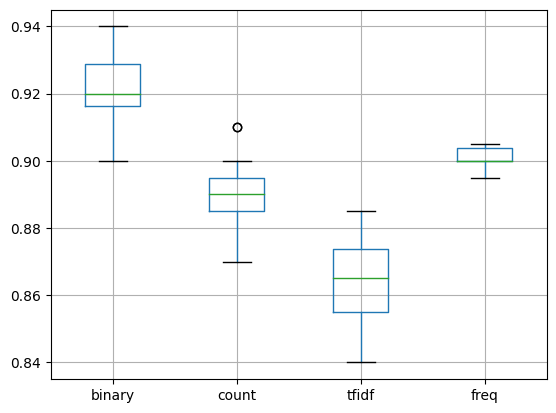

In [10]:
from numpy import array
from string import punctuation
from os import listdir
from collections import Counter
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from pandas import DataFrame
from matplotlib import pyplot

# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

# turn a doc into clean tokens
def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    # remove punctuation from each token
    table = str.maketrans('', '', punctuation)
    tokens = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return tokens

# load doc, clean and return line of tokens
def doc_to_line(filename, vocab):
    # load the doc
    doc = load_doc(filename)
    # clean doc
    tokens = clean_doc(doc)
    # filter by vocab
    tokens = [w for w in tokens if w in vocab]
    return ' '.join(tokens)

# load all docs in a directory
def process_docs(directory, vocab, is_trian):
    lines = list()
    # walk through all files in the folder
    for filename in listdir(directory):
        # skip any reviews in the test set
        if is_trian and filename.startswith('cv9'):
            continue
        if not is_trian and not filename.startswith('cv9'):
            continue
        # create the full path of the file to open
        path = directory + '/' + filename
        # load and clean the doc
        line = doc_to_line(path, vocab)
        # add to list
        lines.append(line)
    return lines

# evaluate a neural network model
def evaluate_mode(Xtrain, ytrain, Xtest, ytest):
    scores = list()
    n_repeats = 30
    n_words = Xtest.shape[1]
    for i in range(n_repeats):
        # define network
        model = Sequential()
        model.add(Dense(50, input_shape=(n_words,), activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        # compile network
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        # fit network
        model.fit(Xtrain, ytrain, epochs=50, verbose=2)
        # evaluate
        loss, acc = model.evaluate(Xtest, ytest, verbose=0)
        scores.append(acc)
        print('%d accuracy: %s' % ((i+1), acc))
    return scores

# prepare bag of words encoding of docs
def prepare_data(train_docs, test_docs, mode):
    # create the tokenizer
    tokenizer = Tokenizer()
    # fit the tokenizer on the documents
    tokenizer.fit_on_texts(train_docs)
    # encode training data set
    Xtrain = tokenizer.texts_to_matrix(train_docs, mode=mode)
    # encode training data set
    Xtest = tokenizer.texts_to_matrix(test_docs, mode=mode)
    return Xtrain, Xtest

# load the vocabulary
vocab_filename = 'vocab.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)
# load all training reviews
positive_lines = process_docs('txt_sentoken/pos', vocab, True)
negative_lines = process_docs('txt_sentoken/neg', vocab, True)
train_docs = negative_lines + positive_lines
# load all test reviews
positive_lines = process_docs('txt_sentoken/pos', vocab, False)
negative_lines = process_docs('txt_sentoken/neg', vocab, False)
test_docs = negative_lines + positive_lines
# prepare labels
ytrain = array([0 for _ in range(900)] + [1 for _ in range(900)])
ytest = array([0 for _ in range(100)] + [1 for _ in range(100)])

modes = ['binary', 'count', 'tfidf', 'freq']
results = DataFrame()
for mode in modes:
    # prepare data for mode
    Xtrain, Xtest = prepare_data(train_docs, test_docs, mode)
    # evaluate model on data for mode
    results[mode] = evaluate_mode(Xtrain, ytrain, Xtest, ytest)
# summarize results
print(results.describe())
# plot results
results.boxplot()
pyplot.show()

# Making a Prediction for New Reviews

In [12]:
# classify a review as negative (0) or positive (1)
def predict_sentiment(review, vocab, tokenizer, model):
    # clean
    tokens = clean_doc(review)
    # filter by vocab
    tokens = [w for w in tokens if w in vocab]
    # convert to line
    line = ' '.join(tokens)
    # encode
    encoded = tokenizer.texts_to_matrix([line], mode='freq')
    # prediction
    yhat = model.predict(encoded, verbose=0)
    return round(yhat[0,0])

In [13]:
# test positive text
text = 'Best movie ever!'
print(predict_sentiment(text, vocab, tokenizer, model))
# test negative text
text = 'This is a bad movie.'
print(predict_sentiment(text, vocab, tokenizer, model))

1
0
